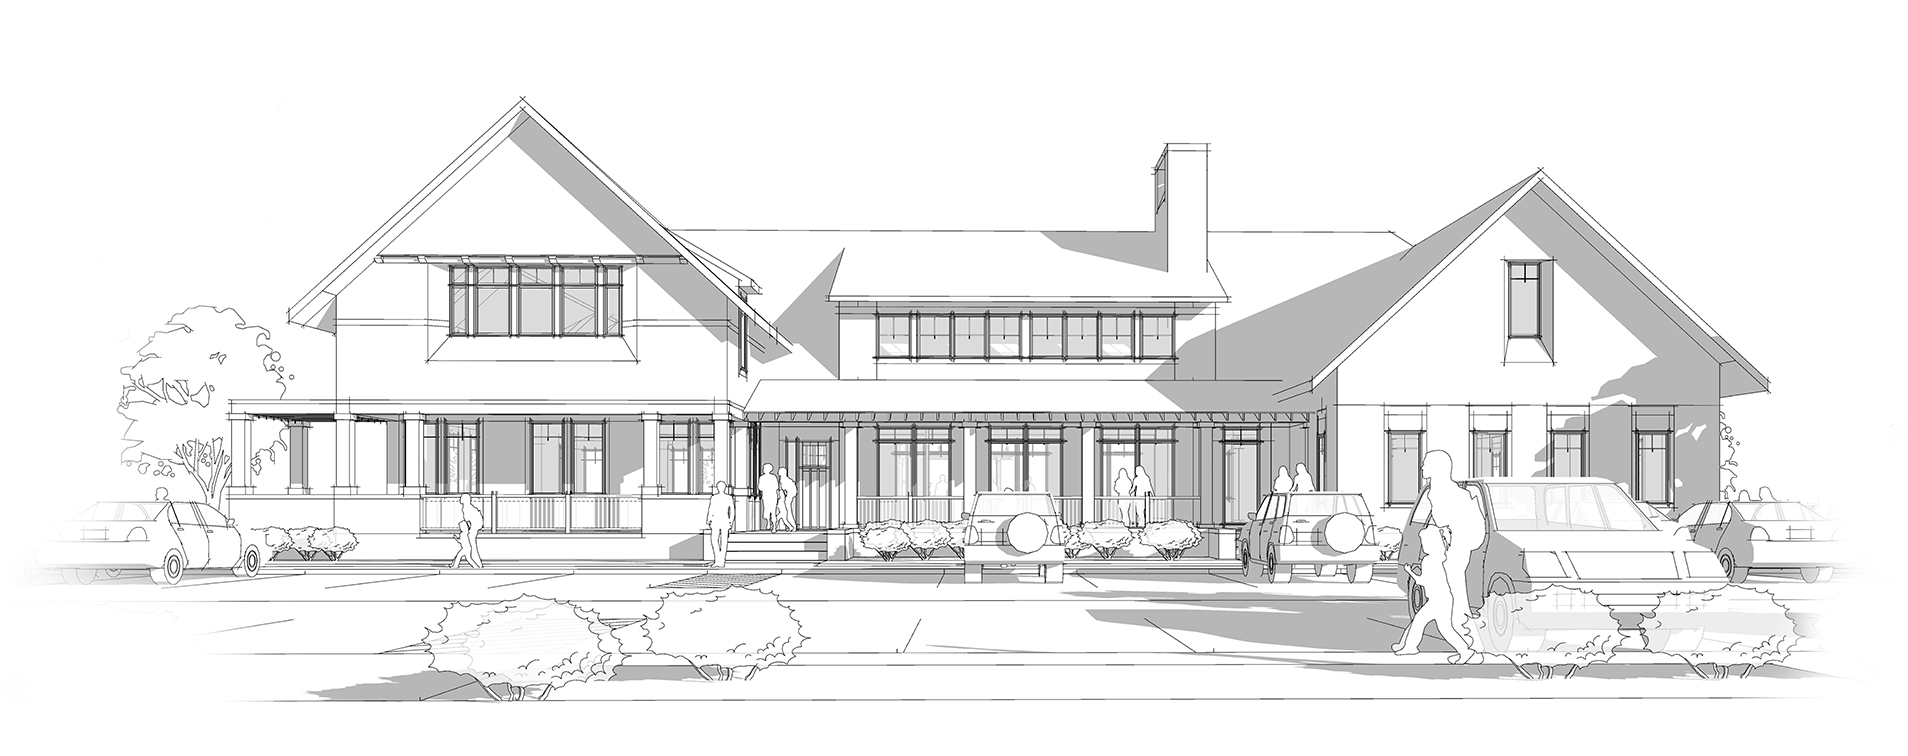

# Final Project Submission

Please fill out:
* Student name: Myrna Grace Calip
* Student pace: Part Time
* Scheduled project review date/time: 11/3/21
* Instructor name: Claude Fried
* Blog post URL:


# Overview

We are given the dataset to Kings County, Washington housing sales from 2014-2015 to provide homeowners who currently live in Kings County, Washington on price expectations when trying to sell their home.

Our data is narrowed down to these constraints:

- Price range narrowed down to 78,000 to 1,120,000
- Square footage of (370-4230)
- Bedrooms (1-6)
- Bathrooms (.50-4.75)
- Floors (1-3)
- Grade (1-11)

* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Overview of Data

In [2]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
house_df.info()
house_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

(21597, 21)

In [4]:
# look at the unique values for price
house_df.price.unique()[:5]

array([221900., 538000., 180000., 604000., 510000.])

In [5]:
# sanity check missing values
house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# looking at the statistics of all the numerical features
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning & Exploring

Plan 
- Set the columns(waterfront, view, yr_renovated) with missing values to '0'
- Replace column dtypes for necessary columns


In [7]:
# check the value counts for each column.
for value in house_df.columns:
    print(value) # column name
    print(house_df[value].value_counts(ascending=False)) # distribution of frequently occuring values
    print('                               ')

id
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
                               
date
6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
11/30/2014      1
5/27/2015       1
1/17/2015       1
7/27/2014       1
11/2/2014       1
Name: date, Length: 372, dtype: int64
                               
price
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
                               
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
                               
bathrooms
2.50    5377

Notice:
- sqft_basement has '?' which means we need to set it to the median
- ID which is the identifier for the house has duplicates meaning the houses were sold more than once

In [8]:
# Fill missing values and fix the dtypes
# need to drop the bedroom outlier
# is sqft_above & sqft_basement = sqft_living?
# drop ID since it is an identifer and won't give us any results when compared to price

# change missing values to the median 0
house_df['waterfront'].fillna(0, inplace=True)
# convert from float to int
house_df['waterfront'] = house_df['waterfront'].astype('int64')

# change missing values to the median 0
house_df['view'].fillna(0, inplace=True)
# convert from float to int
house_df['view'] = house_df['view'].astype('int64')

# change missing values to the median 0
house_df['yr_renovated'].fillna(0, inplace=True)
# convert from float to int
house_df['yr_renovated'] = house_df['yr_renovated'].astype('int64')

# replace '?' values to the median and then converting from float to int
house_df['sqft_basement'] = house_df['sqft_basement'].replace(to_replace='?',value=0)
house_df['sqft_basement'] = pd.to_numeric(house_df['sqft_basement'])
house_df['sqft_basement'] = house_df['sqft_basement'].astype('int64')

# convert zipcode to string
house_df['zipcode'] = house_df['zipcode'].astype(str)

# drop ID column
house_df.drop(columns = ['id', 'date', 'lat', 'long'], axis=1, inplace=True)

# double check data summary 
house_df.info()
house_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  object 
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

Reasons for dropped values:
- ID is an identifier feature which won't affect our results when comparing it to price
- Date, lat, & long we won't find much results in relation to our business problem

In [9]:
# is sqft_above & sqft_basement = sqft_living?
# possibly drop one of them?

above_basement_sum = house_df['sqft_above'] + house_df['sqft_basement']
above_basement_sum

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Length: 21597, dtype: int64

In [10]:
house_df['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

I noticed here that the sum of sqft_above and sqft_basement equivalent to sqft_living so they could possibly show high collinearity when we check later on

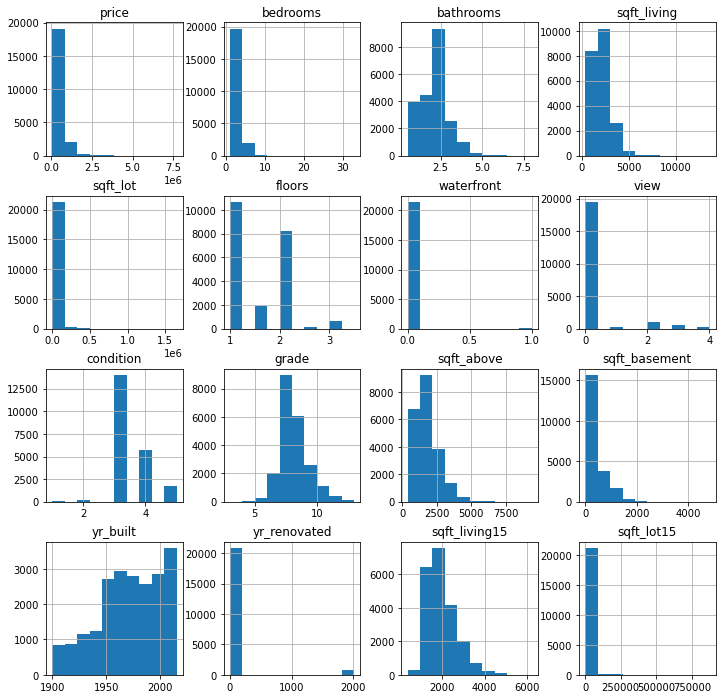

In [11]:
house_df.hist(figsize=(12,12));

A lot of the variables are not normally distributed. Options to combat this is to feature engineer or do a log transformation on the variables to make them more normally distributed. Next we will check which features are continuous and categorical

In [12]:
def make_scatterplot_feature(data):
    TARGET = 'price'
    X_VALS = [x_col for x_col in house_df.columns if x_col != TARGET]
    
    for x in X_VALS:
        sns.scatterplot(x=x, y=TARGET, data=data)#.set(title=f'Price by {X_VALS}')        
        plt.show()

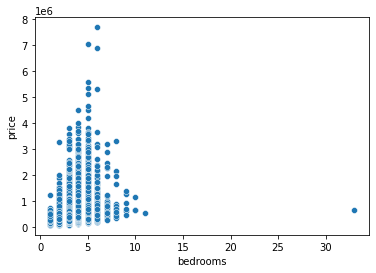

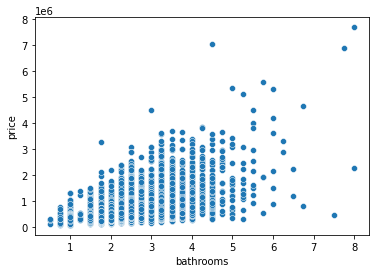

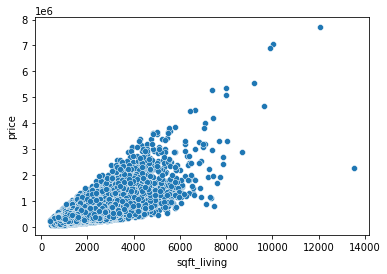

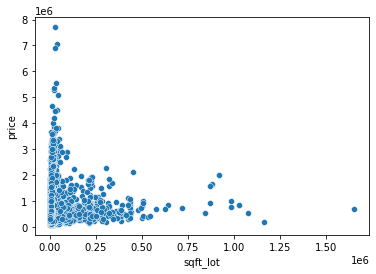

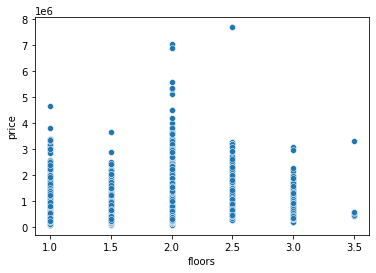

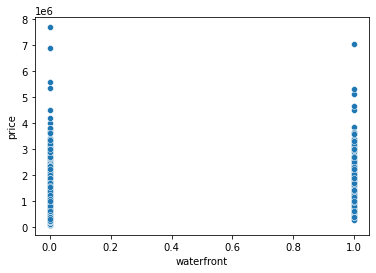

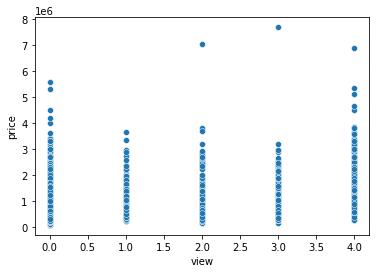

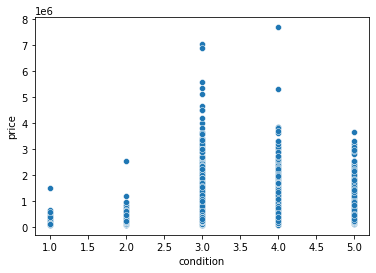

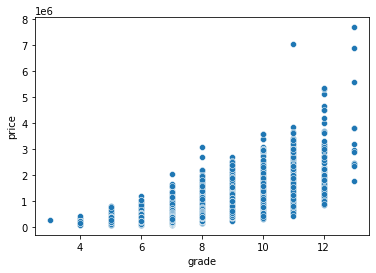

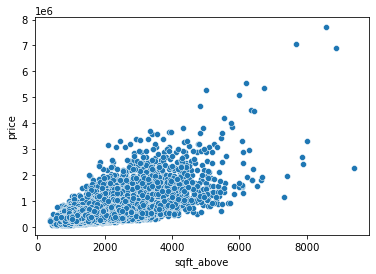

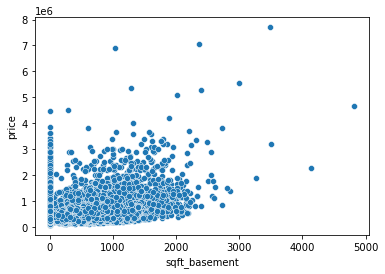

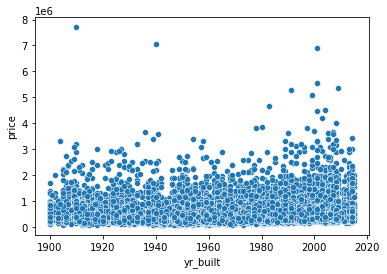

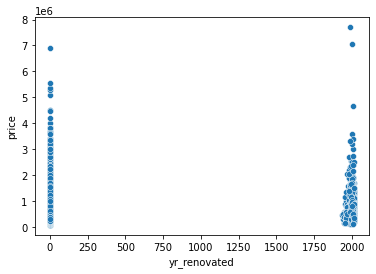

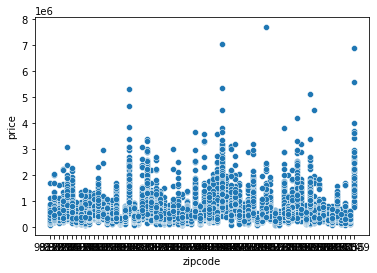

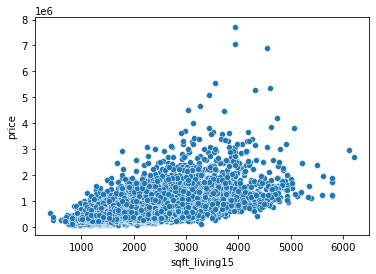

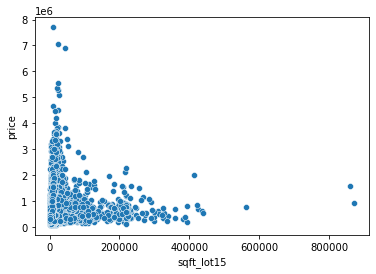

In [13]:
make_scatterplot_feature(house_df)

Looking at the scatterplots between the features will help us determine the numerical and categorical variables in regards to price. The scatter plots that show vertical line structrue will be our catergorical variables while the graphs with a cloud structure will be our numerical variables.

This also well help us visualize linearity between the price vs. features. We can see that square footage of house, basement, above, grade, bathrooms, and bedrooms & square foot living 15 have a positive correlation to price.

### Feature Engineering

In [14]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  object 
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 

In [15]:
# house_data['has_basement'] = house_data.sqft_basement.map(lambda x: 1 if x > 0 else 0)

In [16]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [17]:
num_var = ['sqft_living', 'sqft_lot', 'sqft_above', 'yr_renovated',
           'sqft_living15', 'sqft_lot15', 'sqft_basement', 'yr_built',]

cat_var = ['bedrooms', 'bathrooms', 'floors', 'condition', 
           'grade', 'zipcode', 'waterfront', 'view']

Taking a closer look on which variables are numerical and categorical

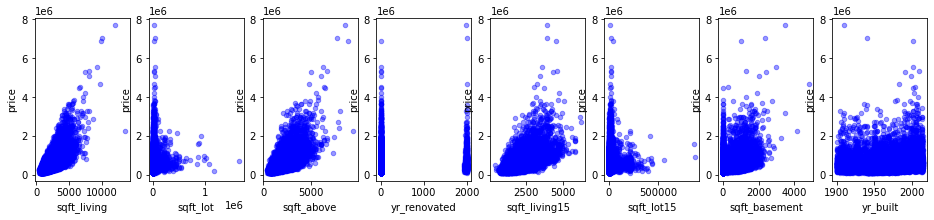

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(16,3))

for xcol, ax in zip(num_var, axes):
    house_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

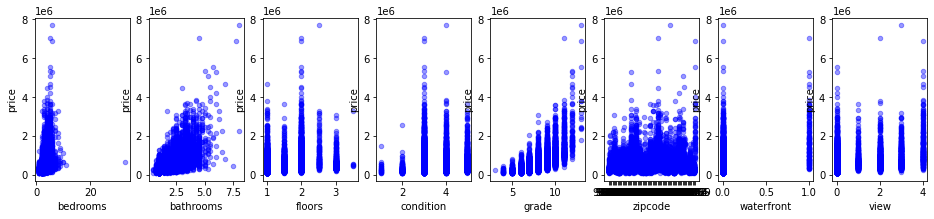

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(16,3))

for xcol, ax in zip(cat_var, axes):
    house_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### Multicollinearity Check
- When the independent variables are related to each other
- Indiates that changes in one predictor are associated with changes in another one as well

In [20]:
def make_heatmap(data):
    TARGET = 'price'
    FEATURES = [x_col for x_col in data.columns if x_col != TARGET]
    
    corr = data[FEATURES].corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(15, 15))
        ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='coolwarm', annot=True)

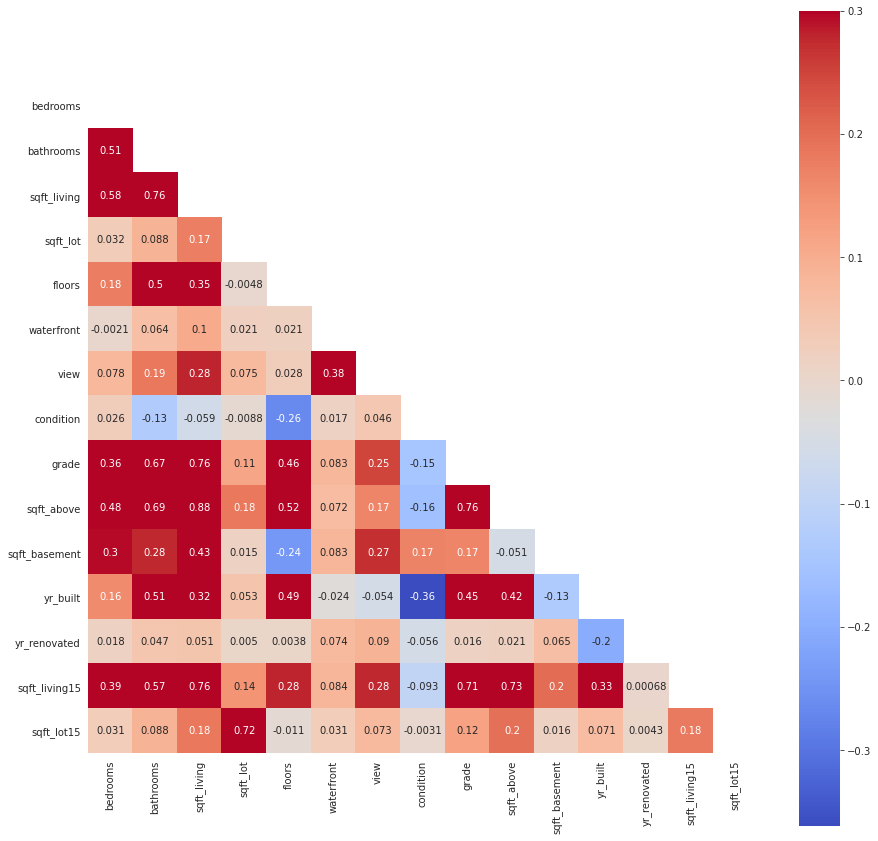

In [21]:
make_heatmap(house_df)

- Dark red represents strong positive linear relationships
- Dark blue presents strong negative linear relationships
- r > .65 produces multicollinearity in a model
- Multicollinearity is when there is high correlation between three or more variables

In [22]:
# pd.plotting.scatter_matrix(house_data[FEATURES],figsize  = [15,15]);
# plt.show()

# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

TARGET = 'price'
FEATURES = [x_col for x_col in house_df.columns if x_col != TARGET]

high_corr=house_df[FEATURES].corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
high_corr['pairs'] = list(zip(high_corr.level_0, high_corr.level_1))

# set index to pairs
high_corr.set_index(['pairs'], inplace = True)

#drop level columns
high_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
high_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
high_corr.drop_duplicates(inplace=True)

In [23]:
high_corr[(high_corr.cc>.65) & (high_corr.cc <1)][(high_corr.cc>.65) & (high_corr.cc <1)]

<ipython-input-23-8bf7edaade49>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_corr[(high_corr.cc>.65) & (high_corr.cc <1)][(high_corr.cc>.65) & (high_corr.cc <1)]


,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot, sqft_lot15)",0.718204
"(sqft_living15, grade)",0.713867
"(sqft_above, bathrooms)",0.686668


The dataframe above shows the collinearity between features. 

In [24]:
# drop the highly correlated variables
# gotta do something about grades, bathrooms, sqft_living
house_df.drop(columns = ['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1, inplace=True)
house_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,98103
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,98146
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,98144
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,98027


In [25]:
house_df.columns
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  object 
dtypes: float64(3), int64(10), object(1)
memory usage: 2.3+ MB


#### Removing Outliers
- removing outliers using IQR & boxplots
- removing outliers is important when setting up our model or else it will lead to our model to not pass the normality assumption
- Since majority of our features are not normally distributed we'll use IQR to remove the outliers to make them less skewed

In [26]:
house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,285.716581,1970.999676,68.758207
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,439.819830,29.375234,364.037499
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,550.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,4820.000000,2015.000000,2015.000000


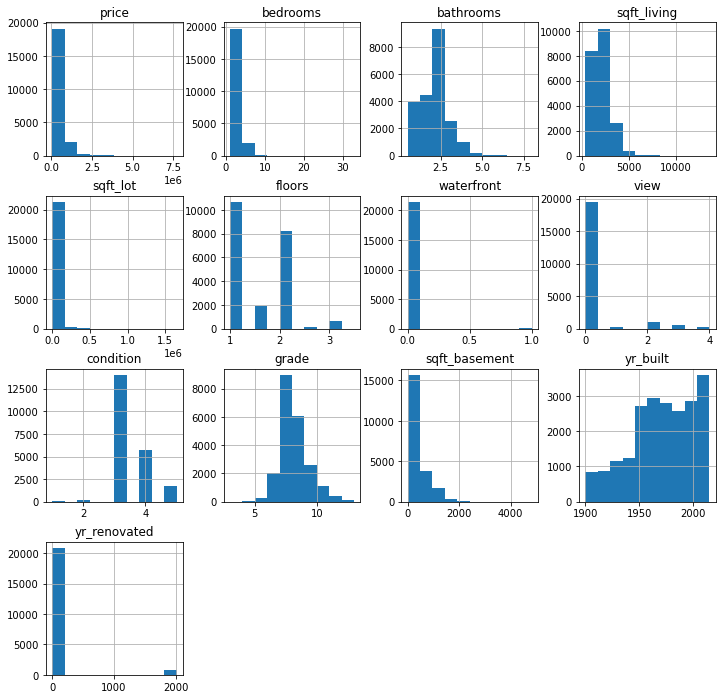

In [27]:
house_df.hist(figsize=(12,12));

In [28]:
# define a function that return box plots of the columns
def plot_boxplot(data, cols):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.boxplot(x=cols, data=data, ax=ax)

In [29]:
def get_valuecounts(col, data):
    data[col].value_counts().plot(kind='bar')
    sns.despine;

In [30]:
# define a function that will return a list of index outliers
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR #detects the outliers
    upper_bound = Q3 + 1.5 * IQR
    
    print(abs(lower_bound),upper_bound)
    
    lst = df.index[(df[col] < lower_bound) |( df[col] > upper_bound)]
    
    return lst

In [31]:
# empty list to store the output indices from multiple rows
index_list = []
for feature in ['price', 'sqft_living']:
    index_list.extend(outliers(house_df, feature))


162500.0 1129500.0
250.0 4230.0


In [32]:
# define function that will return the cleaned house_data without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [33]:
house_df = remove(house_df, index_list)

In [34]:
def barplot_clean(data, feature_clean):
    data = data.groupby(feature_clean).median().reset_index().sort_values('price')
    fig, ax = plt.subplots(figsize=(8,8))
    sns.barplot(x=data[feature_clean],y=data['price'], data=data, palette='vlag')
    
    ax.set_title(f'Median Price for {feature_clean.title()}')
    plt.xlabel(feature_clean)
    plt.ylabel('Price in millions')
    ax.set_xticklabels(labels=data[feature_clean], rotation=270)

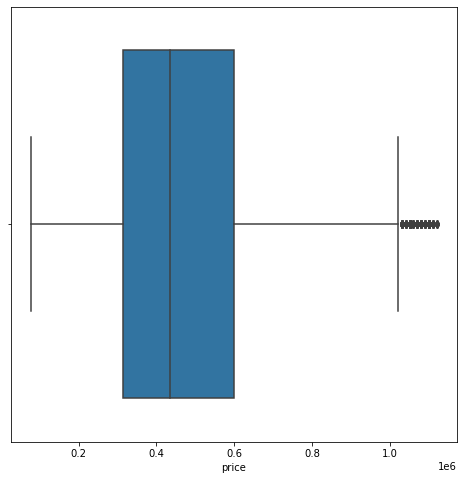

In [35]:
plot_boxplot(house_df, 'price')

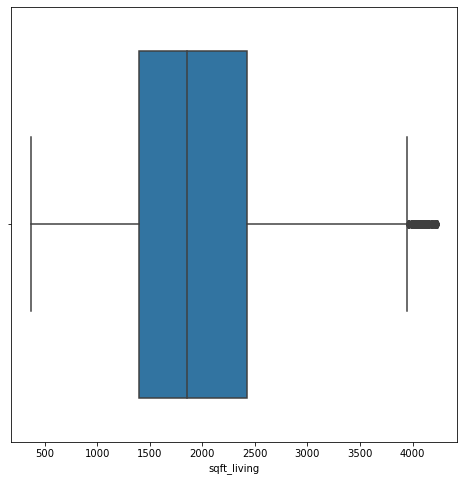

In [36]:
plot_boxplot(house_df, 'sqft_living')

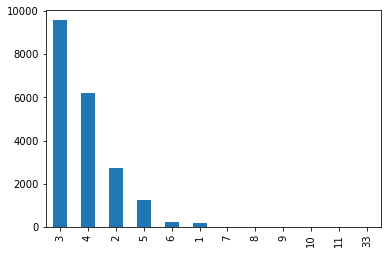

In [37]:
get_valuecounts('bedrooms', house_df)

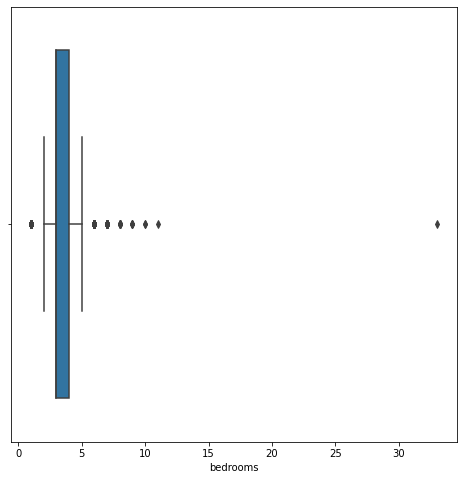

In [38]:
plot_boxplot(house_df, 'bedrooms')

Majority of the bedroom data is in between 1-6. To avoid outliers in our model we must set the bedroom data to 1-6.

In [39]:
house_df = house_df[house_df['bedrooms'] < 7]

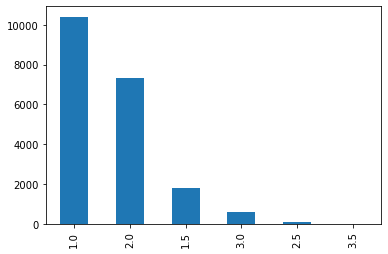

In [40]:
get_valuecounts('floors', house_df)

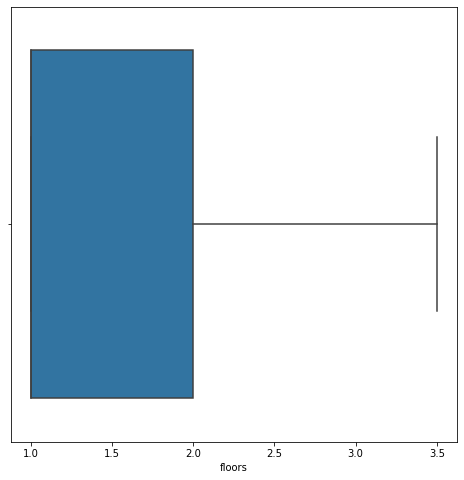

In [41]:
plot_boxplot(house_df, 'floors')

In [42]:
house_df = house_df[house_df['floors'] < 3.5]

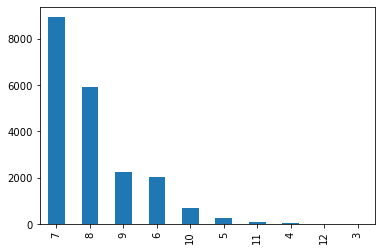

In [43]:
get_valuecounts('grade', house_df)

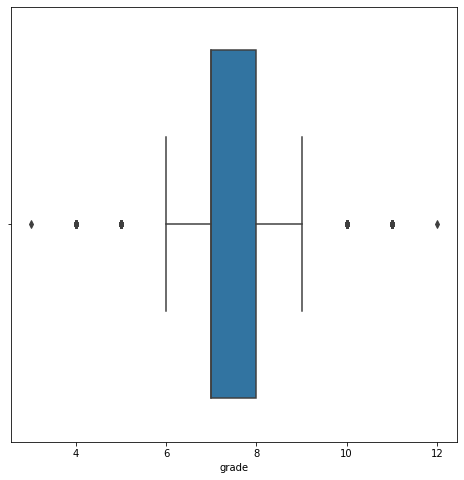

In [44]:
plot_boxplot(house_df, 'grade')

In [45]:
house_df = house_df[(house_df.grade > 4)  &  (house_df.grade < 12)]

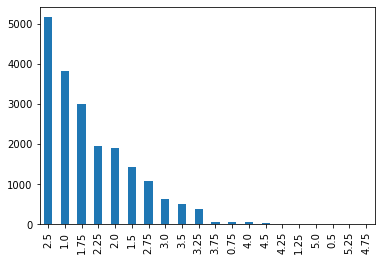

In [46]:
get_valuecounts('bathrooms', house_df)

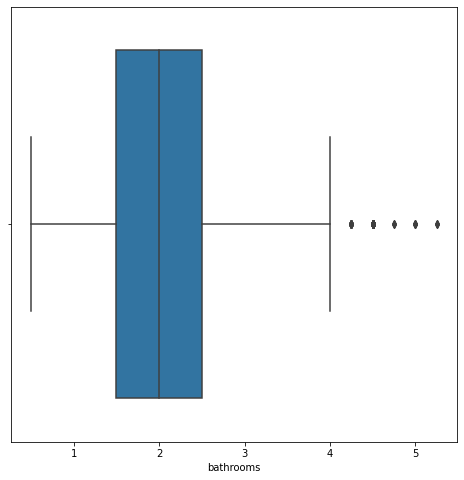

In [47]:
plot_boxplot(house_df, 'bathrooms')

In [48]:
house_df = house_df[house_df.bathrooms < 5]

In [49]:
# repress exponential
house_df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated
count,20181.00000,20181.00000,20181.00000,20181.00000,20181.00000,20181.00000,20181.00000,20181.00000,20181.00000,20181.00000,20181.00000,20181.00000,20181.00000
mean,473465.83653,3.31227,2.03708,1950.73069,14245.53372,1.47171,0.00248,0.16783,3.40855,7.51628,255.29448,1970.69650,60.80888
std,204799.81908,0.85204,0.69027,729.62737,39028.68833,0.53562,0.04971,0.63216,0.64750,1.00765,395.32245,29.14170,343.00938
min,78000.00000,1.00000,0.50000,370.00000,520.00000,1.00000,0.00000,0.00000,1.00000,5.00000,0.00000,1900.00000,0.00000
25%,315000.00000,3.00000,1.50000,1400.00000,5000.00000,1.00000,0.00000,0.00000,3.00000,7.00000,0.00000,1951.00000,0.00000
50%,435000.00000,3.00000,2.00000,1850.00000,7500.00000,1.00000,0.00000,0.00000,3.00000,7.00000,0.00000,1974.00000,0.00000
75%,599900.00000,4.00000,2.50000,2415.00000,10228.00000,2.00000,0.00000,0.00000,4.00000,8.00000,500.00000,1996.00000,0.00000
max,1120000.00000,6.00000,4.75000,4230.00000,1651359.00000,3.00000,1.00000,4.00000,5.00000,11.00000,2150.00000,2015.00000,2015.00000


Results:
- Price range narrowed down to 78,000 to 1,120,000
- Sqft_living (370-4230)
- Bedrooms (1-6)
- Bathrooms (.50-4.75)
- Floors (1-3)
- Grade (1-11)

In [50]:
# % of data we'll be using
(20181/21597) * 100

93.44353382414225

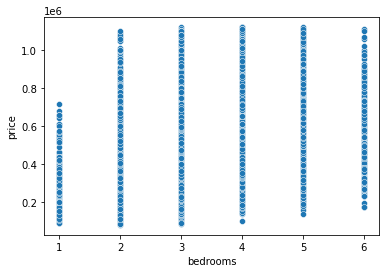

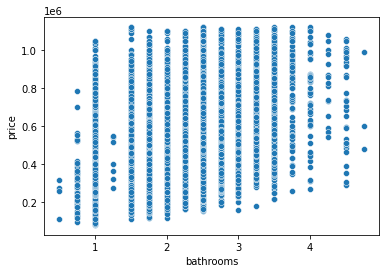

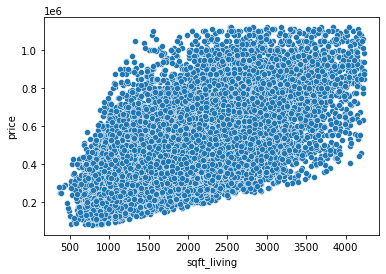

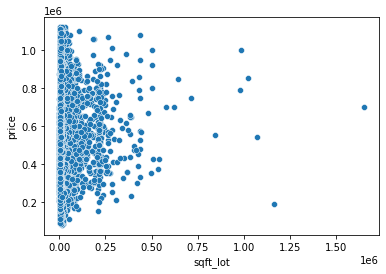

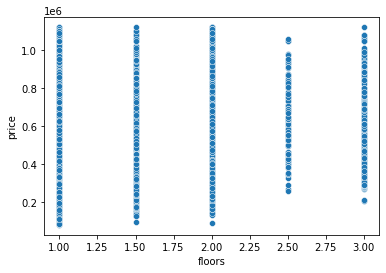

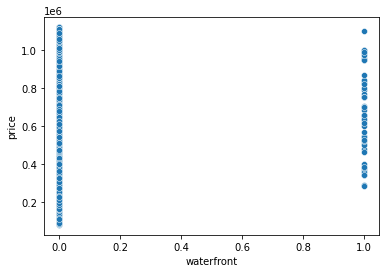

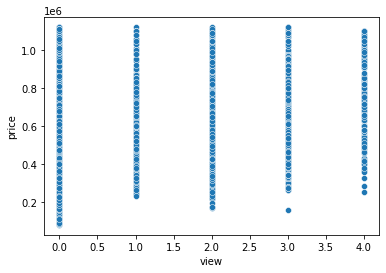

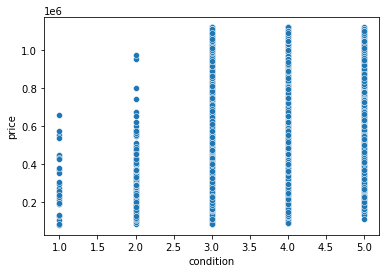

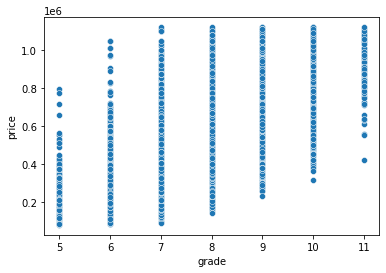

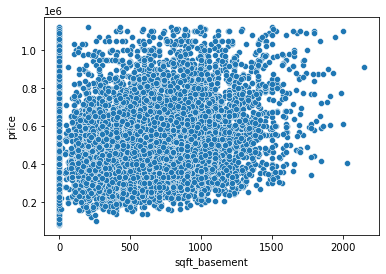

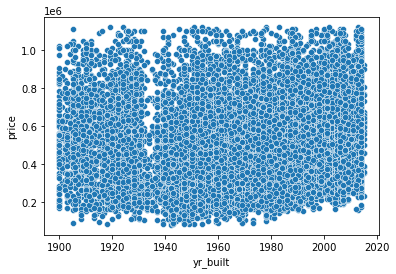

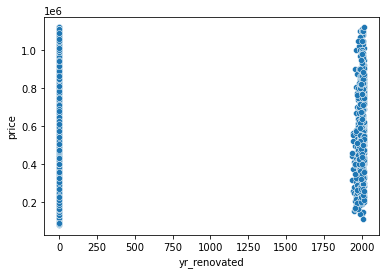

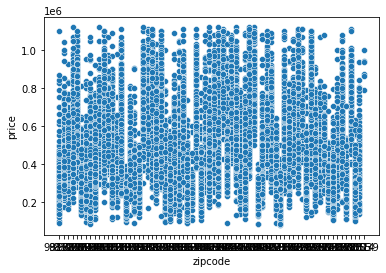

In [51]:
# check our newly cleaned data
make_scatterplot_feature(house_df)

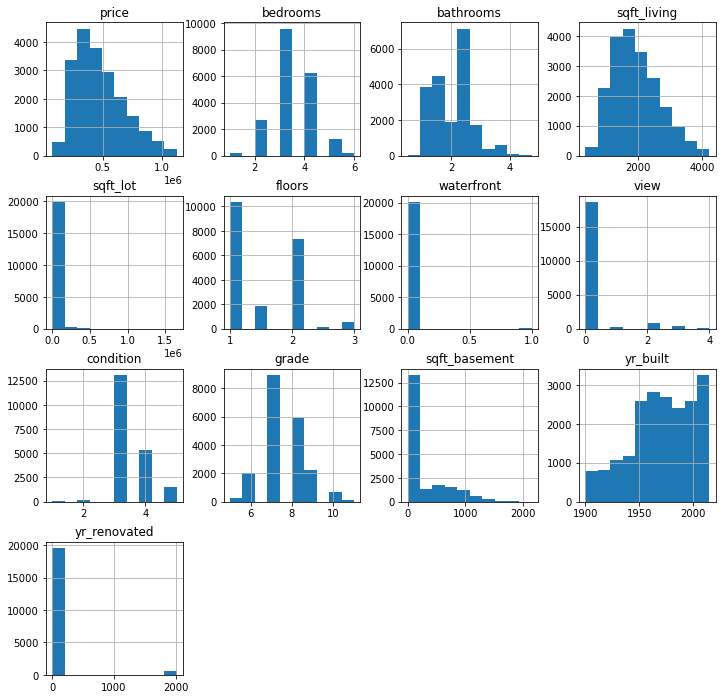

In [52]:
house_df.hist(figsize=(12,12));

Price and bathrooms are less skewed

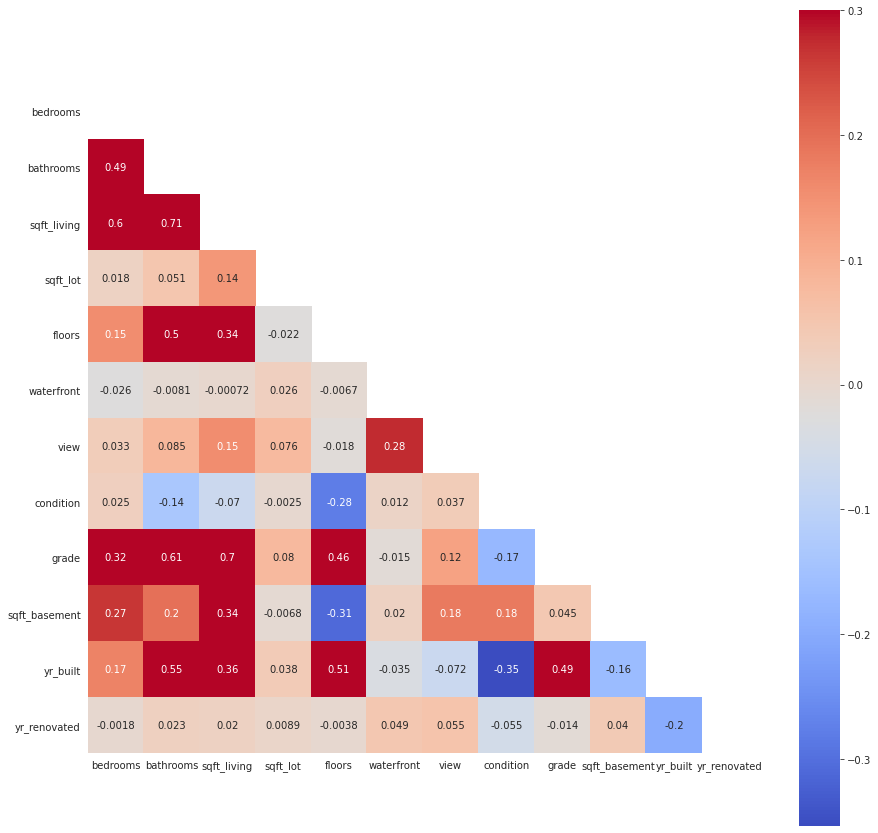

In [53]:
# check multicollinearity on the clean data
make_heatmap(house_df)

There's less collinearity than the previous heatmap among the features except for sqft_living, grade & sqft_living and bathrooms

In [54]:
# sns.lmplot(y='price', x='sqft_living', data=house_df).set(title='Price by Square Footage')
# plt.ticklabel_format(style='plain', axis='y')
# plt.show()

# Linear Regression Models

Lets build a linear regression model with all the variables to see how it affects the price individually. Some variables to look out for is our R^2, p-values, and the coefficients. 

Keep in mind: 
- R^2 explains how 'accurate' our regression model is and it is a good predictor for the dependent variable. % of variance we can explain by the model
- p-values explains how statstically significant the variables are (smaller the p-value the more statistically significant they are)
- coefficient - explains whether the price goes up or down

### Test-Train Split
Split the dataset into two parts.
- Uses sample data for training 75%
- Uses remaining samples for testing model 25%

In [55]:
def test_train_split(data, TARGET, test_size, random_state = 100):
    
    data = data.copy()
    
    # Separate independant variables from dependant variable.
    X = data.drop(columns=[TARGET])
    y = data[TARGET]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size=test_size, random_state=random_state)
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    num = X_train.select_dtypes('number').columns
    cat = X_train.select_dtypes('object').columns
    
    return X_train, X_test, y_train, y_test

### OHE

In [56]:
def test_train_split_OHE(data, TARGET, test_size, random_state = 100):
    data = data.copy()
    
    # Separate independant variables from dependant variable.
    X = data.drop(columns=[TARGET])
    y = data[TARGET]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size=test_size, random_state=random_state)
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    num = X_train.select_dtypes('number').columns
    cat = X_train.select_dtypes('object').columns
    
    # OHE categorical variable process
    ohe = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = ohe.fit_transform(X_train[cat])
    X_train_ohe = pd.DataFrame(X_train_ohe, 
                               columns = ohe.get_feature_names(cat))

    X_test_ohe = ohe.transform(X_test[cat])
    X_test_ohe = pd.DataFrame(X_test_ohe, 
                              columns = ohe.get_feature_names(cat))
    
    # Combine OHE data.
    X_train_ohe_com = pd.concat([X_train[num], 
                         X_train_ohe], 
                        axis=1)
    X_test_ohe_com = pd.concat([X_test[num], 
                        X_test_ohe], 
                       axis=1)
    
    return X_train_ohe_com, X_test_ohe_com, y_train, y_test

### Transform using StandardScaler()
- Scales the values while taking into account standard deviation. This will help reduce the effect of outliers in   features.
- mu = 0
- pop std = 1

We only transform the numerical categories that aren't ordinal

In [57]:
def test_train_scale_ohe(data, TARGET, test_size, random_state = 100):
    
    data = data.copy()
    
    # test-train-split process
    X = data.drop(columns=[TARGET])
    y = data[TARGET]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X,y, test_size = test_size, random_state=random_state)
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
    
    num = X_train.select_dtypes('number').columns
    cat = X_train.select_dtypes('object').columns
    
    # OHE categorical variable process
    ohe = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = ohe.fit_transform(X_train[cat])
    X_train_ohe = pd.DataFrame(X_train_ohe, 
                               columns = ohe.get_feature_names(cat))

    X_test_ohe = ohe.transform(X_test[cat])
    X_test_ohe = pd.DataFrame(X_test_ohe, 
                              columns = ohe.get_feature_names(cat))
    
    
    # Scale numerical x_variables process
    scale = StandardScaler()
    X_train_num = scale.fit_transform(X_train[num])
    X_train_num = pd.DataFrame(X_train_num, columns=num)
    
    # Transform to dataframes.
    X_test_num = scale.transform(X_test[num])
    X_test_num = pd.DataFrame(X_test_num, columns = num)
    
    # Combine processed data.
    X_train_processed = pd.concat([X_train_num, X_train_ohe], 
                                  axis=1).reset_index(drop=True)
    X_test_processed = pd.concat([X_test_num, X_test_ohe], axis=1)

    y_train = y_train.reset_index(drop=True)
    
    return X_train_processed, X_test_processed, y_train, y_test

### Assumption of Linear Regression 

1. *Residual Normality*
    - `sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)`
    - *Omnibus Value*
    
    
2. *Homoskedasticity*
    - *Durbin-Watson*
    - ~1.5 - ~2.5
    
    
3. *Multicollinearity*
    - *VIF* (`variance_inflation_factor()`)
    - VIF > 5 - highly collinear
    - VIF > 10 - must remove
    
4. *Overfitting* 
    - RMSE
    - MSE
    - A big difference between the test and training rest (R)MSE is an indication of overfitting

In [58]:
def check_normality(model):
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.show()

In [59]:
def create_vif_dct(dataframe, const_col_name='const'):
    
    if const_col_name not in dataframe.columns:
        dataframe = sm.add_constant(dataframe)
        
    # Dummy-checking.
    df = dataframe.select_dtypes('number')
    if df.shape != dataframe.shape:
        warnings.warn('\n\nThere are non-numerical columns trying to be passed!\nThese have automatically been removed.\n')
    if df.isna().sum().any():
        raise ValueError('There may not be any missing values in the dataframe!')
        
    X_cols = [c for c in df.columns.to_list() if c not in ['price']]
    X = df[X_cols]
    pd.set_option('display.float_format', '{:.2f}'.format)
    vif = pd.DataFrame()
    pd.set_option('display.max_rows', None)
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    vif['features'] = X.columns
    
    return vif

In [60]:
from statsmodels.stats.stattools import durbin_watson

def homoscedasticity(model):
    durbinwaston = durbin_watson(model)
    return f" Durbin Watson Score : {durbinwaston} "

In [61]:
def visualize_homoscedasticity(df, model, resids):
    
    y = df['price']
    y_hat = model.predict()
    fig, ax = plt.subplots()
    ax.set(xlabel="Predicted {}".format(y.name),
           ylabel="Residuals (Actual - Predicted {})".format(y.name))
    plt.axhline(0)
    return ax.scatter(y_hat, resids, alpha=0.2);

In [62]:
from sklearn.linear_model import LinearRegression

def check_overfit(X_train, X_test, y_train, y_test):

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_pred_train = linreg.predict(X_train)
    y_pred_test = linreg.predict(X_test)

    train_residuals = y_pred_train - y_train
    test_residuals = y_pred_test - y_test

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    print('Train MSE:', mse_train)
    print('Test MSE:', mse_test)

    print('RMSE Train:', np.sqrt(mse_train))
    print('RMSE Test:', np.sqrt(mse_test))

    print('R2 Score:', round(r2_score(y_test, y_pred_test),3))

## Model 1 - Initial Model

In [63]:
house_df.columns
house_df.drop(columns = 'yr_built', axis = 1, inplace = True)

In [64]:
model1_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode']

In [65]:
X_train_processed, X_test_processed, y_train, y_test = test_train_scale_ohe(house_df[model1_cols], 'price', 
                                                                    test_size = .25, random_state = 100)

In [66]:
create_vif_dct(X_train_processed)

,VIF,features
0,56.79,const
1,1.74,bedrooms
2,2.69,bathrooms
3,4.26,sqft_living
4,1.20,sqft_lot
5,2.21,floors
6,1.18,waterfront
7,1.22,view
8,1.19,condition
9,2.67,grade


In [67]:
model_1 = sm.OLS(y_train, sm.add_constant(X_train_processed)).fit()
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                Adj. R-squared:       0.825      
Dependent Variable:     price              AIC:                  386695.5658
Date:                   2021-11-09 03:41   BIC:                  387313.1718
No. Observations:       15135              Log-Likelihood:       -1.9327e+05
Df Model:               80                 F-statistic:          895.5      
Df Residuals:           15054              Prob (F-statistic):   0.00       
R-squared:              0.826              Scale:                7.2665e+09 
----------------------------------------------------------------------------
                 Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
const         297551.5180  5221.5273  56.9855 0.0000 287316.6896 307786.3463
bedrooms       -2703.2169   914.0732  -2.9573 0.0031  -4494.9115   -911.5222
bathrooms       4407.7746  1135.4113   3.8821 0.0001   2182.2303   6633.3188
sqft_living    98309.7644  1430.8488  68.7073 0.0000  95505.1267 101114.4021
sqft_lot       13403.9484   759.1471  17.6566 0.0000  11915.9278  14891.9690
floors        -14216.2572  1030.9343 -13.7897 0.0000 -16237.0137 -12195.5008
waterfront      7880.1638   752.0742  10.4779 0.0000   6406.0070   9354.3205
view           21926.0410   764.2158  28.6909 0.0000  20428.0851  23423.9969
condition      17250.7183   756.5745  22.8011 0.0000  15767.7403  18733.6962
grade          44673.8192  1132.6934  39.4403 0.0000  42453.6025  46894.0360
sqft_basement -21149.2463   966.6145 -21.8797 0.0000 -23043.9283 -19254.5642
yr_renovated    8241.1412   704.4143  11.6993 0.0000   6860.4034   9621.8789
zipcode_98002   5587.0099  8661.9832   0.6450 0.5189 -11391.5302  22565.5500
zipcode_98003   1353.6521  7910.9165   0.1711 0.8641 -14152.7062  16860.0103
zipcode_98004 528805.8798  9593.6011  55.1207 0.0000 510001.2552 547610.5044
zipcode_98005 345423.5954  9748.0134  35.4353 0.0000 326316.3040 364530.8868
zipcode_98006 283248.6552  7337.6531  38.6021 0.0000 268865.9631 297631.3473
zipcode_98007 260669.5576 10497.4633  24.8317 0.0000 240093.2532 281245.8619
zipcode_98008 246962.3323  8039.1770  30.7199 0.0000 231204.5679 262720.0967
zipcode_98010  87017.0847 11174.7776   7.7869 0.0000  65113.1621 108921.0074
zipcode_98011 159557.3187  8650.1581  18.4456 0.0000 142601.9571 176512.6803
zipcode_98014 113123.9934 10383.5626  10.8945 0.0000  92770.9483 133477.0385
zipcode_98019 103858.9151  9146.4262  11.3551 0.0000  85930.8077 121787.0225
zipcode_98022 -12356.3540  8385.1568  -1.4736 0.1406 -28792.2808   4079.5727
zipcode_98023 -20621.4945  6852.6927  -3.0093 0.0026 -34053.6053  -7189.3836
zipcode_98024 157586.8279 12892.5639  12.2231 0.0000 132315.8351 182857.8207
zipcode_98027 197367.0714  7343.9635  26.8747 0.0000 182972.0101 211762.1327
zipcode_98028 140119.0249  7951.3237  17.6221 0.0000 124533.4637 155704.5861
zipcode_98029 234553.8373  7703.5598  30.4475 0.0000 219453.9235 249653.7511
zipcode_98030  10236.5528  8177.5784   1.2518 0.2107  -5792.4952  26265.6008
zipcode_98031  12282.0805  7972.0090   1.5407 0.1234  -3344.0264  27908.1873
zipcode_98032  -7105.8961 10489.2584  -0.6774 0.4981 -27666.1180  13454.3257
zipcode_98033 325473.3580  7339.5895  44.3449 0.0000 311086.8703 339859.8457
zipcode_98034 188145.6116  6790.5720  27.7069 0.0000 174835.2649 201455.9582
zipcode_98038  42783.7026  6693.0844   6.3922 0.0000  29664.4434  55902.9618
zipcode_98039 637894.9307 42953.9973  14.8507 0.0000 553699.8736 722089.9879
zipcode_98040 435355.4106  9238.0694  47.1262 0.0000 417247.6715 453463.1498
zipcode_98042   7734.0453  6711.4096   1.1524 0.2492  -5421.1334  20889.2240
zipcode_98045 107819.5335  8368.0698  12.8846 0.0000  91417.0994 124221.9676
zipcode_98052 260707.9084  6681.3807  39.0201 0

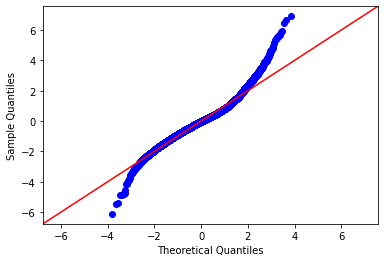

In [68]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

In [69]:
homoscedasticity(model_1.resid)

' Durbin Watson Score : 2.0084059963619376 '

In [70]:
check_overfit(X_train_processed, X_test_processed, y_train, y_test)

Train MSE: 7227621496.861067
Test MSE: 7403180245.185302
RMSE Train: 85015.41917123662
RMSE Test: 86041.73548450369
R2 Score: 0.827


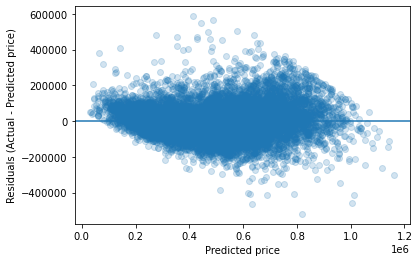

In [71]:
visualize_homoscedasticity(house_df[model1_cols], model_1, model_1.resid)

#### Analysis of Initial Model
- Our intercept is our base price for this model
- High coefficients are sqft_living, grade, and view. 
- There’s a lot of high p-values for some zipcodes meaning they are not statistically significant in this model 
- The qq-plot shows that the model is not normally distributed as well as the Jarque-Bera p-value (very low). Does not meet normally assumption 
- VIF scores show that the features in this are independent of each other 
- Durbin Watson Score shows that the residuals are homoscedastic as well as the residual plots
- Our R-squared in  this model explains about 83% of the variance in housing prices since we have many features its expected to have a high R-squared
- The RMSE train and test are within the 1000s from each other so the model is not overfit



## Models - Without location

Lets take a closer look into what qualities of a house is important.

In [72]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [73]:
model2_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated']

In [74]:
X_train_processed, X_test_processed, y_train, y_test = test_train_scale_ohe(house_df[model2_cols], 'price', 
                                                                    test_size = .25, random_state = 100)

In [75]:
create_vif_dct(X_train_processed)

,VIF,features
0,1.00,const
1,1.68,bedrooms
2,2.57,bathrooms
3,3.79,sqft_living
4,1.05,sqft_lot
5,1.89,floors
6,1.08,waterfront
7,1.14,view
8,1.12,condition
9,2.36,grade


In [76]:
model_2 = sm.OLS(y_train, sm.add_constant(X_train_processed)).fit()
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                Adj. R-squared:       0.492      
Dependent Variable:    price              AIC:                  402783.1659
Date:                  2021-11-09 03:41   BIC:                  402874.6631
No. Observations:      15135              Log-Likelihood:       -2.0138e+05
Df Model:              11                 F-statistic:          1335.      
Df Residuals:          15123              Prob (F-statistic):   0.00       
R-squared:             0.493              Scale:                2.1131e+10 
---------------------------------------------------------------------------
                 Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------
const         473115.6446 1181.6074 400.4000 0.0000 470799.5513 475431.7379
bedrooms       -9379.4253 1532.4113  -6.1207 0.0000 -12383.1366  -6375.7140
bathrooms     -14915.6249 1893.4522  -7.8775 0.0000 -18627.0199 -11204.2298
sqft_living    67814.9653 2301.4486  29.4662 0.0000  63303.8479  72326.0828
sqft_lot         492.5049 1213.3717   0.4059 0.6848  -1885.8504   2870.8602
floors         14022.7750 1624.8196   8.6304 0.0000  10837.9322  17207.6178
waterfront      3038.9612 1228.0175   2.4747 0.0133    631.8985   5446.0238
view           21087.8564 1262.8923  16.6981 0.0000  18612.4348  23563.2779
condition      26024.9894 1249.5061  20.8282 0.0000  23575.8063  28474.1725
grade          86409.9576 1814.7832  47.6145 0.0000  82852.7633  89967.1520
sqft_basement  16479.4586 1500.7182  10.9810 0.0000  13537.8695  19421.0477
yr_renovated   17715.1159 1189.1413  14.8974 0.0000  15384.2552  20045.9766
---------------------------------------------------------------------------
Omnibus:                745.735          Durbin-Watson:             1.999  
Prob(Omnibus):          0.000            Jarque-Bera (JB):          912.412
Skew:                   0.520            Prob(JB):                  0.000  
Kurtosis:               3.605            Condition No.:             4      
===========================================================================

"""

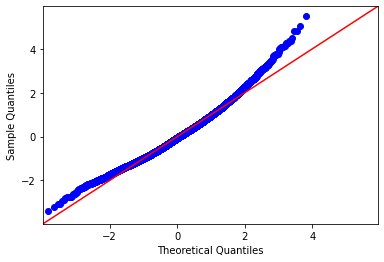

In [77]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

In [78]:
homoscedasticity(model_2.resid)

' Durbin Watson Score : 1.9993384209287528 '

In [79]:
check_overfit(X_train_processed, X_test_processed, y_train, y_test)

Train MSE: 21114672099.72735
Test MSE: 21312697079.699074
RMSE Train: 145308.885136895
RMSE Test: 145988.68819089743
R2 Score: 0.503


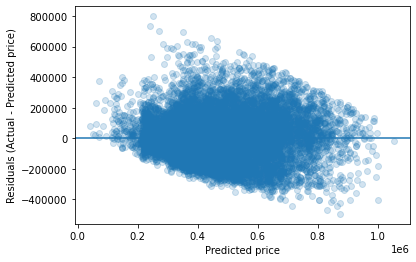

In [80]:
visualize_homoscedasticity(house_df[model2_cols], model_2, model_2.resid)

#### Analysis of Model #2
- p-value for sqft_lot is very high so that feature is not statistically significant. Meaning we can't gain any insights from that feature.
- R-squared is at 56% which is expected since we dropped the zipcodes features
- This model's qq-plot mostly sticks to the line which represents some normality with the exception of max values of the residual line.
- DB score is less than 2.5 which passes the homoscedasticity assumption as well the scatter plot
- The VIF score is also below 5 so the features for this model are independent from each other
- RMSE for the train and test are 2 values away from each other so the model not overfit

## Models - Unscaled

In [81]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [82]:
model3_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode']

In [83]:
X_train_ohe_com, X_test_ohe_com, y_train, y_test = test_train_split_OHE(house_df[model3_cols], 'price', 
                                                                    test_size = .25, random_state = 100)

In [84]:
create_vif_dct(X_train_ohe_com)

,VIF,features
0,206.48,const
1,1.74,bedrooms
2,2.69,bathrooms
3,4.26,sqft_living
4,1.20,sqft_lot
5,2.21,floors
6,1.18,waterfront
7,1.22,view
8,1.19,condition
9,2.67,grade


In [85]:
model_3 = sm.OLS(y_train, sm.add_constant(X_train_ohe_com)).fit()
model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                   OLS                 Adj. R-squared:        0.825      
Dependent Variable:      price               AIC:                   386695.5658
Date:                    2021-11-09 03:41    BIC:                   387313.1718
No. Observations:        15135               Log-Likelihood:        -1.9327e+05
Df Model:                80                  F-statistic:           895.5      
Df Residuals:            15054               Prob (F-statistic):    0.00       
R-squared:               0.826               Scale:                 7.2665e+09 
-------------------------------------------------------------------------------
                 Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------
const         -351745.7651  9956.5655 -35.3280 0.0000 -371261.8440 -332229.6863
bedrooms        -3177.1367  1074.3258  -2.9573 0.0031   -5282.9459   -1071.3275
bathrooms        6391.1595  1646.3172   3.8821 0.0001    3164.1777    9618.1413
sqft_living       134.7087     1.9606  68.7073 0.0000     130.8656     138.5517
sqft_lot            0.3278     0.0186  17.6566 0.0000       0.2915       0.3642
floors         -26452.1693  1918.2579 -13.7897 0.0000  -30212.1880  -22692.1506
waterfront     164057.1534 15657.4342  10.4779 0.0000  133366.6787  194747.6281
view            34722.4773  1210.2261  28.6909 0.0000   32350.2871   37094.6676
condition       26609.6189  1167.0331  22.8011 0.0000   24322.0922   28897.1456
grade           44430.5752  1126.5260  39.4403 0.0000   42222.4473   46638.7031
sqft_basement     -53.6952     2.4541 -21.8797 0.0000     -58.5056     -48.8849
yr_renovated       23.6802     2.0241  11.6993 0.0000      19.7127      27.6476
zipcode_98002    5587.0099  8661.9832   0.6450 0.5189  -11391.5302   22565.5500
zipcode_98003    1353.6521  7910.9165   0.1711 0.8641  -14152.7062   16860.0103
zipcode_98004  528805.8798  9593.6011  55.1207 0.0000  510001.2552  547610.5044
zipcode_98005  345423.5954  9748.0134  35.4353 0.0000  326316.3040  364530.8868
zipcode_98006  283248.6552  7337.6531  38.6021 0.0000  268865.9631  297631.3473
zipcode_98007  260669.5576 10497.4633  24.8317 0.0000  240093.2532  281245.8619
zipcode_98008  246962.3323  8039.1770  30.7199 0.0000  231204.5679  262720.0967
zipcode_98010   87017.0847 11174.7776   7.7869 0.0000   65113.1621  108921.0074
zipcode_98011  159557.3187  8650.1581  18.4456 0.0000  142601.9571  176512.6803
zipcode_98014  113123.9934 10383.5626  10.8945 0.0000   92770.9483  133477.0385
zipcode_98019  103858.9151  9146.4262  11.3551 0.0000   85930.8077  121787.0225
zipcode_98022  -12356.3540  8385.1568  -1.4736 0.1406  -28792.2808    4079.5727
zipcode_98023  -20621.4945  6852.6927  -3.0093 0.0026  -34053.6053   -7189.3836
zipcode_98024  157586.8279 12892.5639  12.2231 0.0000  132315.8351  182857.8207
zipcode_98027  197367.0714  7343.9635  26.8747 0.0000  182972.0101  211762.1327
zipcode_98028  140119.0249  7951.3237  17.6221 0.0000  124533.4637  155704.5861
zipcode_98029  234553.8373  7703.5598  30.4475 0.0000  219453.9235  249653.7511
zipcode_98030   10236.5528  8177.5784   1.2518 0.2107   -5792.4952   26265.6008
zipcode_98031   12282.0805  7972.0090   1.5407 0.1234   -3344.0264   27908.1873
zipcode_98032   -7105.8961 10489.2584  -0.6774 0.4981  -27666.1180   13454.3257
zipcode_98033  325473.3580  7339.5895  44.3449 0.0000  311086.8703  339859.8457
zipcode_98034  188145.6116  6790.5720  27.7069 0.0000  174835.2649  201455.9582
zipcode_98038   42783.7026  6693.0844   6.3922 0.0000   29664.4434   55902.9618
zipcode_98039  637894.9307 42953.9973  14.8507 0.0000  553699.8736  722089.9879
zipcode_98040  435355.4106  9238.0694  47.1262 0.0000  417247.6715  453463.1498
zipcode_98042    7734.0453  6711.4096   1.1524 0.2492  

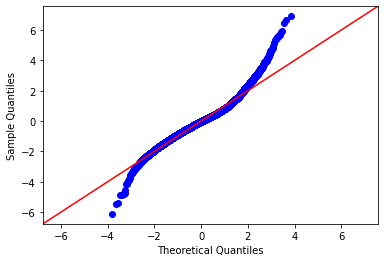

In [86]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [87]:
homoscedasticity(model_3.resid)

' Durbin Watson Score : 2.008405996361583 '

In [88]:
check_overfit(X_train_ohe_com, X_test_ohe_com, y_train, y_test)

Train MSE: 7227621496.861067
Test MSE: 7403180245.193546
RMSE Train: 85015.41917123662
RMSE Test: 86041.7354845516
R2 Score: 0.827


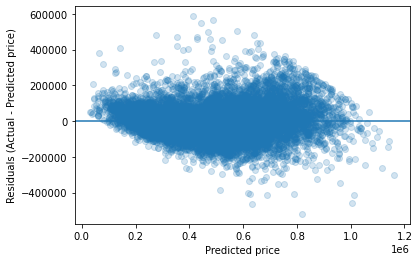

In [89]:
visualize_homoscedasticity(house_df[model3_cols], model_3, model_3.resid)

#### Analysis of Model #3
- This model is the unscaled. Compared to the initial model which is scaled the coefficients are much different.
- We are able to see the exact dollar impact for the given features
- p-values are small besides some zipcodes features
- The model does not pass the normality assumption since the min and max tails are not following the residual line
- R-square is at 83% 
- DB Score passes homoscedasticity assumption
- RMSE train and test doesn't show that it's overfit

## Model #4 - Removing High P-values - Final Model


In [90]:
house_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [91]:
model4_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode']

In [92]:
X_train_processed, X_test_processed, y_train, y_test = test_train_scale_ohe(house_df[model4_cols], 'price', 
                                                                    test_size = .25, random_state = 100)

In [93]:
create_vif_dct(X_train_processed)

,VIF,features
0,56.79,const
1,1.74,bedrooms
2,2.69,bathrooms
3,4.26,sqft_living
4,1.20,sqft_lot
5,2.21,floors
6,1.18,waterfront
7,1.22,view
8,1.19,condition
9,2.67,grade


In [94]:
columns = model_1.pvalues[model_1.pvalues <= 0.05]
columns.index[1:]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118'

In [95]:
model_4 = sm.OLS(y_train, sm.add_constant(X_train_processed[columns.index[1:]])).fit()
model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                  OLS                Adj. R-squared:       0.825      
Dependent Variable:     price              AIC:                  386693.7146
Date:                   2021-11-09 03:42   BIC:                  387257.9472
No. Observations:       15135              Log-Likelihood:       -1.9327e+05
Df Model:               73                 F-statistic:          980.9      
Df Residuals:           15061              Prob (F-statistic):   0.00       
R-squared:              0.826              Scale:                7.2690e+09 
----------------------------------------------------------------------------
                 Coef.     Std.Err.     t     P>|t|     [0.025      0.975]  
----------------------------------------------------------------------------
const         301045.7170  2114.9422 142.3423 0.0000 296900.1734 305191.2607
bedrooms       -2678.6676   913.8026  -2.9313 0.0034  -4469.8317   -887.5034
bathrooms       4506.5697  1134.5291   3.9722 0.0001   2282.7548   6730.3846
sqft_living    98352.8756  1429.9525  68.7805 0.0000  95549.9949 101155.7564
sqft_lot       13104.8796   749.3012  17.4895 0.0000  11636.1582  14573.6010
floors        -14187.5161  1030.3203 -13.7700 0.0000 -16207.0691 -12167.9632
waterfront      7928.1720   752.0347  10.5423 0.0000   6454.0926   9402.2513
view           21711.0894   760.9415  28.5319 0.0000  20219.5516  23202.6272
condition      17203.8595   754.0592  22.8150 0.0000  15725.8119  18681.9071
grade          44660.3320  1129.1947  39.5506 0.0000  42446.9732  46873.6907
sqft_basement -21133.3705   965.1274 -21.8970 0.0000 -23025.1375 -19241.6035
yr_renovated    8180.9778   704.1072  11.6189 0.0000   6800.8422   9561.1134
zipcode_98004 525302.0314  8318.3461  63.1498 0.0000 508997.0623 541607.0005
zipcode_98005 341880.3723  8493.0615  40.2541 0.0000 325232.9399 358527.8047
zipcode_98006 279748.2235  5562.7808  50.2893 0.0000 268844.4972 290651.9497
zipcode_98007 257071.5532  9347.5487  27.5015 0.0000 238749.2221 275393.8844
zipcode_98008 243503.9784  6463.0420  37.6764 0.0000 230835.6308 256172.3260
zipcode_98010  83848.4077 10096.5559   8.3047 0.0000  64057.9313 103638.8841
zipcode_98011 155931.7304  7220.8464  21.5947 0.0000 141777.9940 170085.4668
zipcode_98014 110109.9945  9216.3048  11.9473 0.0000  92044.9174 128175.0717
zipcode_98019 100478.8287  7805.7415  12.8724 0.0000  85178.6268 115779.0306
zipcode_98023 -24180.3912  4919.3456  -4.9154 0.0000 -33822.9063 -14537.8760
zipcode_98024 154646.2675 11970.8538  12.9186 0.0000 131181.9394 178110.5955
zipcode_98027 193872.6405  5576.3222  34.7671 0.0000 182942.3715 204802.9096
zipcode_98028 136553.7013  6365.3436  21.4527 0.0000 124076.8544 149030.5482
zipcode_98029 230833.6936  6050.2540  38.1527 0.0000 218974.4606 242692.9266
zipcode_98033 321956.0330  5571.3483  57.7878 0.0000 311035.5134 332876.5525
zipcode_98034 184589.9084  4833.5109  38.1896 0.0000 175115.6396 194064.1771
zipcode_98038  39253.4044  4694.4327   8.3617 0.0000  30051.7458  48455.0629
zipcode_98039 634483.1945 42694.1620  14.8611 0.0000 550797.4492 718168.9397
zipcode_98040 431851.7196  7899.2169  54.6702 0.0000 416368.2947 447335.1446
zipcode_98045 104522.2019  6873.2639  15.2071 0.0000  91049.7696 117994.6342
zipcode_98052 257060.6869  4680.3946  54.9229 0.0000 247886.5448 266234.8290
zipcode_98053 234905.6299  5540.4065  42.3986 0.0000 224045.7599 245765.4999
zipcode_98055  43960.4200  6447.5742   6.8181 0.0000  31322.3910  56598.4489
zipcode_98056  95500.9048  5319.2422  17.9539 0.0000  85074.5438 105927.2658
zipcode_98058  36038.3524  5117.0523   7.0428 0.0000  26008.3081  46068.3967
zipcode_98059 100911.1243  5121.2947  19.7042 0.0000  90872.7645 110949.4841
zipcode_98065 130905.2846  6159.3238  21.2532 0.0000 118832.2615 142978.3077
zipcode_98070  88733.7432 10111.9017   8.7752 0

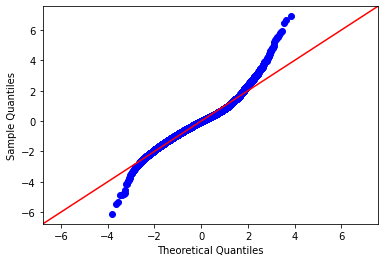

In [96]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

In [97]:
homoscedasticity(model_4.resid)

' Durbin Watson Score : 2.007837455129176 '

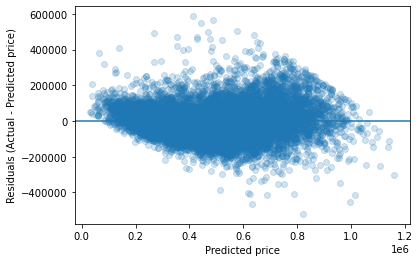

In [98]:
visualize_homoscedasticity(house_df[model4_cols], model_4, model_4.resid)

In [99]:
check_overfit(X_train_processed, X_test_processed, y_train, y_test)

Train MSE: 7227621496.861067
Test MSE: 7403180245.185302
RMSE Train: 85015.41917123662
RMSE Test: 86041.73548450369
R2 Score: 0.827


## Conclusion

After generating several models to understand the relationship between the features and price we have concluded that the most important features in a house is the square footage, grade, and number of views, and condition. 

Keep in mind that our findings are for the following constraints:

- Sqft_living (370-4230)
- Bedrooms (1-6)
- Bathrooms (.50-4.75)
- Floors (1-3)

With 83% variance in our model, we can explain that and as 301,045 our intercept price:
1. Square Foot Living: As one unit of the square footage increases, the price increases by 98,000 dollars
2. Grade: As the building standard moves up 1 grade, the price of the house increases by 45,000 dollars
3. View: If the amount of views goes up by 1, the price of the house increases by 22,000 dollars
4. Condition: As the condition of the house moves up by 1 , the price of the house increases by 17,000 dollars


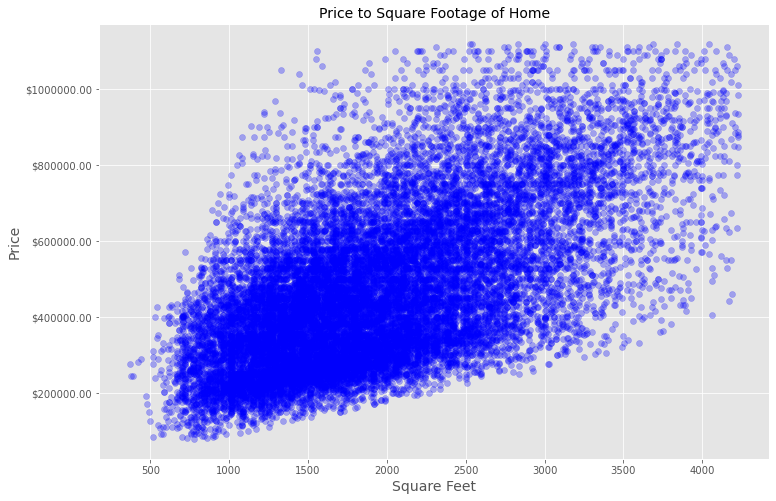

In [133]:
import matplotlib.ticker as ticker
fig ,ax = plt.subplots(figsize=(12,8))
plt.scatter(house_df['sqft_living'],house_df.price, c='blue' ,alpha=.3)
ax.set_xlabel('Square Feet',fontsize=14)
ax.set_ylabel('Price',fontsize=14)
ax.set_title('Price to Square Footage of Home',fontsize=14)
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
plt.style.use('ggplot')
plt.show()

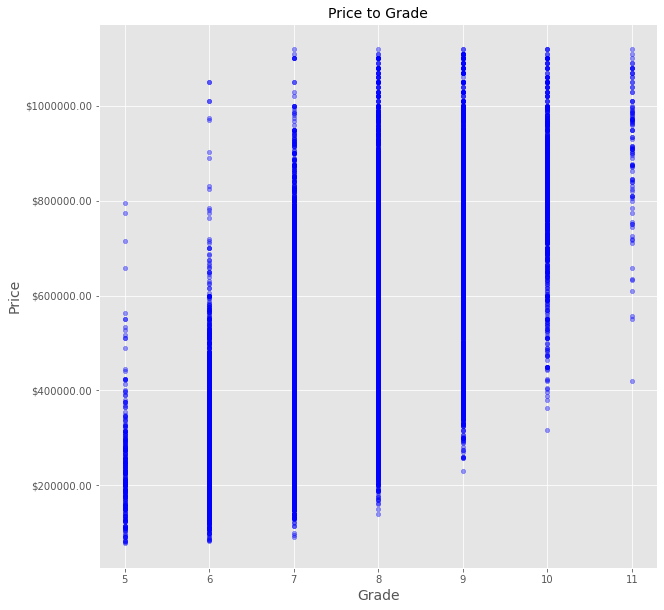

In [144]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
house_df.plot(kind='scatter', x='grade', y='price', ax=ax, alpha=0.4, color='b')
ax.set_xlabel('Grade',fontsize=14)
ax.set_ylabel('Price',fontsize=14)
ax.set_title('Price to Grade',fontsize=14)
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
plt.style.use('ggplot')
plt.show()

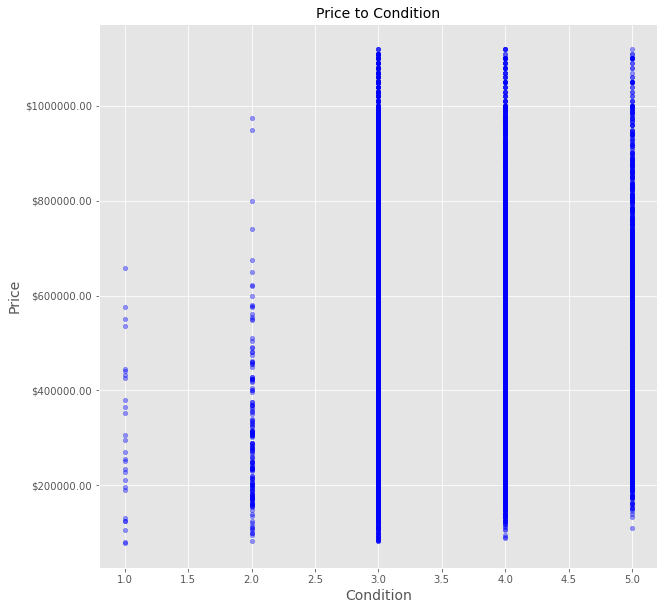

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
house_df.plot(kind='scatter', x='condition', y='price', ax=ax, alpha=0.4, color='b')
ax.set_xlabel('Condition',fontsize=14)
ax.set_ylabel('Price',fontsize=14)
ax.set_title('Price to Condition',fontsize=14)
formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)
plt.style.use('ggplot')
plt.show()

## Future Work

- Look at a more updated dataset: Our data is only from 2014-2015 so there is no way that this is accurate in current times
- Research on other features like living room square footage: Does the area of the living room have an effect of price as well?
- Look into the relation between house features to location: Does location have an effect of building structure (Suburb vs. City)?